<h1 style='color:#0000ec'>4 &nbsp; Emprego da biblioteca SciPy</h1>

&nbsp; Importando as bibliotecas <b>Numpy</b>, <b>SciPy</b> e <b>Matplotlib</b>:

In [1]:
import numpy as np
import scipy.integrate as sciInt
import matplotlib.pyplot as plt

&nbsp; Escrevendo arquivo contendo a função <i><b>modelo_malthus(	&lt;população>,	&lt;tempo>)</b></i> contendo o modelo matemático do fenômeno:

In [2]:
%%writefile ../python/modelo_malthus.py
#Definindo o modelo populacional
def modelo_malthus(t,P):
    return 0.00407*P

Overwriting ../python/modelo_malthus.py


&nbsp; Escrevendo arquivo contendo a função <i><b>modelo_verhulst(	&lt;população>,	&lt;tempo>)</b></i> contendo o modelo matemático do fenômeno:

In [3]:
%%writefile ../python/modelo_verhulst.py
#Definindo o modelo populacional
def modelo_verhulst(t,P):
    L = 218858
    k = 0.04285
    return  (k*(1-P/L))*P

Overwriting ../python/modelo_verhulst.py


&nbsp; Escrevendo arquivo contendo a função <i><b>modelo_montroll(	&lt;população>,	&lt;tempo>)</b></i> contendo o modelo matemático do fenômeno:

In [4]:
%%writefile ../python/modelo_montroll.py
#Definindo o modelo populacional
def modelo_montroll(t,P):
    L = 218858
    k = 0.004
    l = 107.83
    return  (k*(1-(P/L)**(l)))*P

Overwriting ../python/modelo_montroll.py


&nbsp; Criando o vetor tempo de 10 à 21:

In [5]:
t = np.linspace(0,21) #vetor tempo
print(t)
P0 = 186488 # população inicial

[ 0.          0.42857143  0.85714286  1.28571429  1.71428571  2.14285714
  2.57142857  3.          3.42857143  3.85714286  4.28571429  4.71428571
  5.14285714  5.57142857  6.          6.42857143  6.85714286  7.28571429
  7.71428571  8.14285714  8.57142857  9.          9.42857143  9.85714286
 10.28571429 10.71428571 11.14285714 11.57142857 12.         12.42857143
 12.85714286 13.28571429 13.71428571 14.14285714 14.57142857 15.
 15.42857143 15.85714286 16.28571429 16.71428571 17.14285714 17.57142857
 18.         18.42857143 18.85714286 19.28571429 19.71428571 20.14285714
 20.57142857 21.        ]


&nbsp; Carregando o diretório <b>python/</b> que contém as funções escritas ao longo dos tópico e importando o <b>modelo</b>:

In [6]:
import sys
sys.path.insert(0,'../python')

from modelo_malthus import modelo_malthus
from modelo_verhulst import modelo_verhulst
from modelo_montroll import modelo_montroll

<h2 style='color:#0000b7' >&nbsp; 4.1 &nbsp;Modelo de Malthus</h2>

<h3 style='color:#b50000' >&nbsp; &nbsp; 4.1.1 &nbsp;scipy.integrate.odeint - Método LSODA</h3>

In [7]:
sol = sciInt.odeint(modelo_malthus, y0=P0, t=t, tfirst=True)
print(np.transpose(sol))

[[186488.         186813.57235454 187139.71307725 187466.42312288
  187793.70359644 188121.55510753 188449.97878234 188778.97567933
  189108.54685694 189438.69337362 189769.41628781 190100.71665796
  190432.59554253 190765.05399995 191098.09307685 191431.71365434
  191765.91669694 192100.70321837 192436.07423236 192772.03075263
  193108.57379289 193445.70436689 193783.42348832 194121.73217093
  194460.63143267 194800.12235693 195140.20599564 195480.88338027
  195822.1555423  196164.02351323 196506.48832451 196849.55100764
  197193.21259409 197537.47411534 197882.33728405 198227.80160926
  198573.86914759 198920.54093375 199267.81800429 199615.70139758
  199964.19215378 200313.29131491 200662.99992476 201013.31902897
  201364.24967787 201715.79297823 202067.95001382 202420.72185169
  202774.10956144 203128.11421521]]


&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

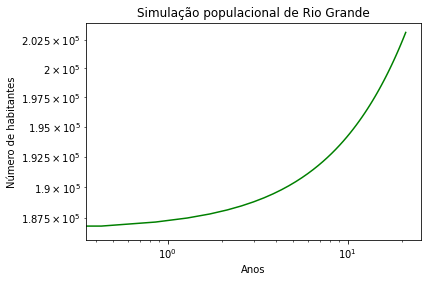

Simulação para 2021: [203128.11421521]
Simulação para 2021 (arredondado): 203128


In [8]:
plt.plot(t,sol,"g")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos")
plt.ylabel("Número de habitantes")
plt.yscale("log")
plt.xscale("log")
plt.show()

print("Simulação para 2021:",sol[sol.shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol[sol.shape[0]-1][0]))

<h3 style='color:#b50000' >&nbsp; &nbsp; 4.1.2 &nbsp;scipy.solve_ivp - Método RK45 (Padrão)</h3>

In [9]:
sol = sciInt.solve_ivp(modelo_malthus, t_span=(0,max(t)), y0=[P0], t_eval=t)
sol.y[0]

array([186488.        , 186813.57221722, 187139.71282099, 187466.42280359,
       187793.70315904, 188121.5548831 , 188449.97897328, 188778.97642882,
       189108.54825085, 189438.69544435, 189769.41901402, 190100.71996547,
       190432.59930611, 190765.05804516, 191098.09719371, 191431.71776464,
       191765.92077266, 192100.70723432, 192436.07816799, 192772.03459387,
       193108.57753396, 193445.70801212, 193783.42705402, 194121.73568716,
       194460.63494086, 194800.12584628, 195140.20943638, 195480.88674597,
       195822.15881168, 196164.02667195, 196506.49136708, 196849.55393916,
       197193.21543213, 197537.47689174, 197882.33936558, 198227.80390305,
       198573.87155539, 198920.54337567, 199267.82041876, 199615.70374138,
       199964.19440206, 200313.29346118, 200663.00198093, 201013.32102531,
       201364.25166017, 201715.79495318, 202067.95197383, 202420.72379345,
       202774.11148518, 203128.11612398])

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>:

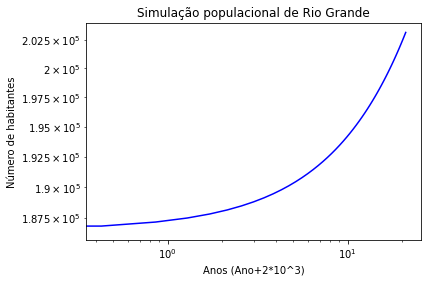

Simulação para 2021: 203128.11612398058
Simulação para 2021 (arredondado): 203128


In [10]:
plt.plot(t,sol.y[0],"b")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.yscale("log")
plt.xscale("log")
plt.show()

print("Simulação para 2021:",sol.y[0][sol.y[0].shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol.y[0][sol.y[0].shape[0]-1]))

<h2 style='color:#0000b7' >&nbsp; 4.2 &nbsp;Modelo de Verhulst</h2>

<h3 style='color:#b50000' >&nbsp; &nbsp; 4.2.1 &nbsp;scipy.integrate.odeint - Método LSODA</h3>

&nbsp; &nbsp; &nbsp; &nbsp; Obtendo aproximação:

In [11]:
t = np.linspace(0,11) #vetor tempo
print(t)
P0 = 197228 # população inicial

[ 0.          0.2244898   0.44897959  0.67346939  0.89795918  1.12244898
  1.34693878  1.57142857  1.79591837  2.02040816  2.24489796  2.46938776
  2.69387755  2.91836735  3.14285714  3.36734694  3.59183673  3.81632653
  4.04081633  4.26530612  4.48979592  4.71428571  4.93877551  5.16326531
  5.3877551   5.6122449   5.83673469  6.06122449  6.28571429  6.51020408
  6.73469388  6.95918367  7.18367347  7.40816327  7.63265306  7.85714286
  8.08163265  8.30612245  8.53061224  8.75510204  8.97959184  9.20408163
  9.42857143  9.65306122  9.87755102 10.10204082 10.32653061 10.55102041
 10.7755102  11.        ]


In [12]:
sol = sciInt.odeint(modelo_verhulst, y0=P0, t=t, tfirst=True)
print(np.transpose(sol))

[[197228.         197414.78255598 197600.125957   197784.03819445
  197966.5271025  198147.60085909 198327.26804058 198505.53666521
  198682.41484806 198857.910705   199032.03235272 199204.78790781
  199376.18548486 199546.23319686 199714.93915238 199882.31140588
  200048.35801495 200213.08707287 200376.50667291 200538.62490835
  200699.44987246 200858.98965851 201017.25235978 201174.24606955
  201329.97888108 201484.45884585 201637.69371542 201789.69142552
  201940.45996841 202090.00733636 202238.3415216  202385.4705164
  202531.40231302 202676.14479793 202819.70553474 202962.09236173
  203103.31314707 203243.37575892 203382.28806546 203520.05793484
  203656.69323523 203792.20162641 203926.59049847 204059.86753969
  204192.04044568 204323.11691208 204453.10463452 204582.01125435
  204709.84403281 204836.61044736]]


&nbsp; &nbsp; Gerando solução com vetor variando de 0 à 500, com o obejtivo de visualizar a assíntota horizontal em <b>P</b> = <b>L</b>

In [13]:
t_lim = np.linspace(0,500)
sol_lim = sciInt.odeint(modelo_verhulst, y0=P0, t=t_lim, tfirst=True)

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

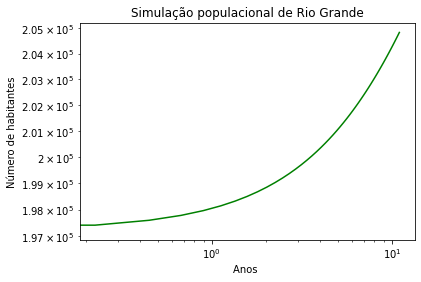

Simulação para 2021: [204836.61044736]
Simulação para 2021 (arredondado): 204837


In [14]:
plt.plot(t,sol,"g")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos ")
plt.ylabel("Número de habitantes")
plt.yscale("log")
plt.xscale("log")
plt.show()

print("Simulação para 2021:",sol[sol.shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol[sol.shape[0]-1][0]))

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b> com característica assintótica:

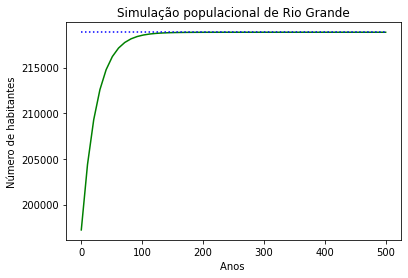

In [15]:
L =218858 #Limite (L)

plt.plot(t_lim,sol_lim,"g") #Curva logística
plt.plot(t_lim,np.full(t_lim.shape[0], L),"b", linestyle = 'dotted') #Assíntota

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos ")
plt.ylabel("Número de habitantes")
plt.show()

<h3 style='color:#b50000' >&nbsp; &nbsp; 4.2.2 &nbsp;scipy.solve_ivp - Método RK45 (Padrão)</h3>

In [16]:
sol = sciInt.solve_ivp(modelo_verhulst, t_span=(0,max(t)), y0=[P0], t_eval=t)
print(sol.y[0])

sol_lim = sciInt.solve_ivp(modelo_verhulst, t_span=(0,max(t_lim)), y0=[P0], t_eval=t_lim)

[197228.         197414.78157933 197600.12408819 197784.03561985
 197966.5242769  198147.59816396 198327.26538737 198505.53405522
 198682.41227734 198857.90816527 199032.02983232 199204.78539351
 199376.18296561 199546.23066712 199714.93661828 199882.30894986
 200048.35586776 200213.08549526 200376.50591783 200538.62520647
 200699.45141769 200858.99259347 201017.25676136 201174.25193437
 201329.98611103 201484.4672754  201637.70339702 201789.70243096
 201940.4723178  202090.02098361 202238.35633998 202385.48628401
 202531.41869831 202676.161451   202819.7223957  202962.10937156
 203103.3302032  203243.39270079 203382.30465999 203520.07386198
 203656.70807342 203792.21504652 203926.60251896 204059.87821396
 204192.04984024 204323.12509202 204453.11164903 204582.01717652
 204709.84932524 204836.61573145]


&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

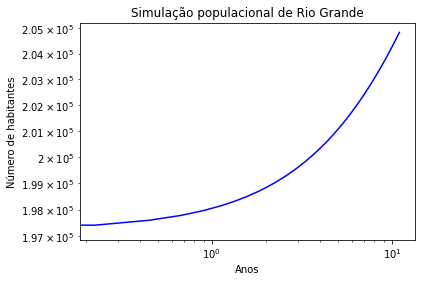

Simulação para 2021: 204836.61573145498
Simulação para 2021 (arredondado): 204837


In [17]:
plt.plot(t,sol.y[0],"b")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos")
plt.ylabel("Número de habitantes")
plt.yscale("log")
plt.xscale("log")
plt.show()

print("Simulação para 2021:",sol.y[0][sol.y[0].shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol.y[0][sol.y[0].shape[0]-1]))

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b> com característica assintótica:

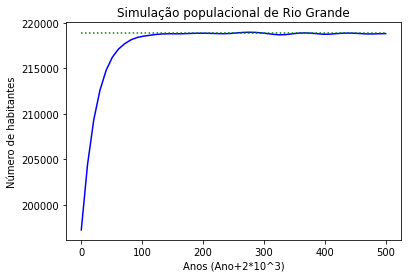

In [18]:
plt.plot(t_lim,sol_lim.y[0],"b") #Curva logística
plt.plot(t_lim,np.full(t_lim.shape[0], L),"g", linestyle = 'dotted') #Assíntota

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

<h2 style='color:#0000b7' >&nbsp; 4.3 &nbsp;Modelo de Montroll</h2>

<h3 style='color:#b50000' >&nbsp; &nbsp; 4.3.1 &nbsp;scipy.integrate.odeint - Método LSODA</h3>

&nbsp; &nbsp; &nbsp; &nbsp; Obtendo aproximação:

In [19]:
t = np.linspace(0,11) #vetor tempo
print(t)
P0 = 197228 # população inicial

[ 0.          0.2244898   0.44897959  0.67346939  0.89795918  1.12244898
  1.34693878  1.57142857  1.79591837  2.02040816  2.24489796  2.46938776
  2.69387755  2.91836735  3.14285714  3.36734694  3.59183673  3.81632653
  4.04081633  4.26530612  4.48979592  4.71428571  4.93877551  5.16326531
  5.3877551   5.6122449   5.83673469  6.06122449  6.28571429  6.51020408
  6.73469388  6.95918367  7.18367347  7.40816327  7.63265306  7.85714286
  8.08163265  8.30612245  8.53061224  8.75510204  8.97959184  9.20408163
  9.42857143  9.65306122  9.87755102 10.10204082 10.32653061 10.55102041
 10.7755102  11.        ]


In [20]:
sol = sciInt.odeint(modelo_montroll, y0=P0, t=t, tfirst=True)
print(np.transpose(sol))

[[197228.         197405.17975757 197582.51842839 197760.01612479
  197937.67297142 198115.48900709 198293.46434505 198471.59909899
  198649.89338256 198828.34730943 199006.96099325 199185.7345477
  199364.66808643 199543.7617213  199723.01539912 199902.42908565
  200082.00283926 200261.73671837 200441.63078137 200621.68508665
  200801.89969261 200982.27465764 201162.81004015 201343.50570552
  201524.3613562  201705.37692476 201886.552346   202067.88755471
  202249.38248566 202431.03707365 202612.8510906  202794.82409628
  202976.95583826 203159.24576912 203341.69376674 203524.29923445
  203707.0616406  203889.98036373 204073.05480056 204256.28421852
  204439.66771369 204623.20436795 204806.89328364 204990.73310093
  205174.72262775 205358.8602669  205543.14445763 205727.5734806
  205912.14545087 206096.85803456]]


&nbsp; &nbsp; &nbsp;Gerando solução com vetor variando de 0 à 500, com o obejtivo de visualizar a assíntota horizontal em <b>P</b> = <b>L</b>

In [21]:
t_lim = np.linspace(0,500)
sol_lim = sciInt.odeint(modelo_verhulst, y0=P0, t=t_lim, tfirst=True)

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

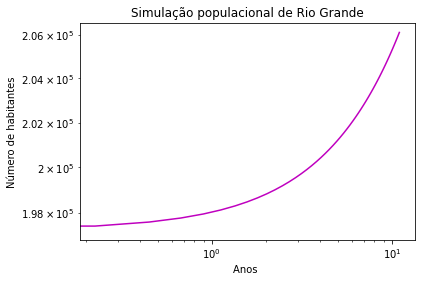

Simulação para 2021: [206096.85803456]
Simulação para 2021 (arredondado): 206097


In [22]:
plt.plot(t,sol,"m")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos ")
plt.ylabel("Número de habitantes")
plt.yscale("log")
plt.xscale("log")
plt.show()

print("Simulação para 2021:",sol[sol.shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol[sol.shape[0]-1][0]))

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b> com característica assintótica:

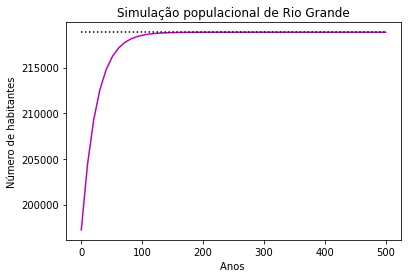

In [23]:
L =218858 #Limite (L)

plt.plot(t_lim,sol_lim,"m") #Curva logística
plt.plot(t_lim,np.full(t_lim.shape[0], L),"k", linestyle = 'dotted') #Assíntota

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos ")
plt.ylabel("Número de habitantes")
plt.show()

<h3 style='color:#b50000' >&nbsp; &nbsp; 4.3.2 &nbsp;scipy.solve_ivp - Método RK45 (Padrão)</h3>

In [24]:
sol = sciInt.solve_ivp(modelo_montroll, t_span=(0,max(t)), y0=[P0], t_eval=t)
print(sol.y[0])

sol_lim = sciInt.solve_ivp(modelo_montroll, t_span=(0,max(t_lim)), y0=[P0], t_eval=t_lim)

[197228.         197405.17974113 197582.51839641 197760.01607968
 197937.67290923 198115.48899903 198293.4644581  198471.59939049
 198649.89389534 198828.34806682 199006.96199414 199185.7357616
 199364.66944853 199543.76312932 199723.0168734  199902.43071244
 200082.00386875 200261.73631842 200441.62845484 200621.68061163
 200801.89306268 200982.26602211 201162.7996443  201343.4940239
 201524.34919577 201705.36513507 201886.54175716 202067.87891769
 202249.37641255 202431.03397787 202612.85129004 202794.8279657
 202976.96356173 203159.25757529 203341.70944376 203524.31854478
 203707.08419625 203890.00565632 204073.08212336 204256.31273604
 204439.69657325 204623.23265414 204806.9199381  204990.75732478
 205174.74365409 205358.87770617 205543.15820142 205727.5838005
 205912.15310431 206096.86465401]


C:\Users\Jhonatan\Documents\GitHub\Modelos-Populacionais\Jupyter\../python\modelo_montroll.py:6: RuntimeWarning: invalid value encountered in power
  return  (k*(1-(P/L)**(l)))*P


&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

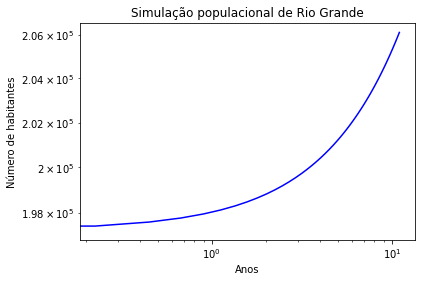

Simulação para 2021: 206096.86465400713
Simulação para 2021 (arredondado): 206097


In [25]:
plt.plot(t,sol.y[0],"b")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos")
plt.ylabel("Número de habitantes")
plt.yscale("log")
plt.xscale("log")
plt.show()

print("Simulação para 2021:",sol.y[0][sol.y[0].shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol.y[0][sol.y[0].shape[0]-1]))

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b> com característica assintótica:

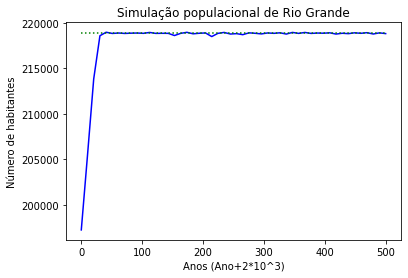

In [26]:
plt.plot(t_lim,sol_lim.y[0],"b") #Curva logística
plt.plot(t_lim,np.full(t_lim.shape[0], L),"g", linestyle = 'dotted') #Assíntota

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()